In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_csv('dados_normalizados_modelo-test-float.csv', delimiter=',', 
                 names=['CIDADE', 'COD_IBGE', 'CASOS_100k_H', 'POP_ALFAB', 'POP_NAO_ALFAB', 'MEDIA_INFRA',
                        'PER_SEXO_F', 'PER_SEXO_M', 'IDADE_MEDIA', 'PER_RACA_BRANCA', 'PERC_RACA_PRETA',
                        'PERC_RACA_AMARELA', 'PERC_RACA_PARDA', 'PERC_RACA_INDIGENA', 'PERC_RACA_IGNORADA',
                        'PERC_SEM_ESCOLARIDADE', 'PERC_ESCOL_FUND_1', 'PERC_ESCOL_FUND_2', 'PERC_ESCOL_MEDIO',
                        'PERC_ESCOL_SUPERIOR', 'PERC_ESCOL_NAO_APLIC', 'PERC_ESCOL_IGNORADO', 'PERC_ZONA_URBANA',
                        'PERC_ZONA_RURAL', 'PERC_ZONA_PERIURBANA', 'PERC_CONTATO_AVE_SUINO_SIM',
                        'PERC_CONTATO_AVE_SUINO_NAO', 'PERC_TOSSE_SIM', 'PERC_TOSSE_NAO', 'PERC_DOWN_SIM', 'PERC_DOWN_NAO',
                        'PERC_VACINADO_GRIPE_SIM', 'PERC_VACINADO_GRIPE_NAO', 'PERC_HIST_VIAGEM_SIM', 'PERC_HIST_VIAGEM_NAO',
                        'PERC_ZONA_IGNORADA'
                       ], skiprows=1)

In [3]:
df.describe()

,COD_IBGE,CASOS_100k_H,POP_ALFAB,POP_NAO_ALFAB,MEDIA_INFRA,PER_SEXO_F,PER_SEXO_M,IDADE_MEDIA,PER_RACA_BRANCA,PERC_RACA_PRETA,...,PERC_CONTATO_AVE_SUINO_NAO,PERC_TOSSE_SIM,PERC_TOSSE_NAO,PERC_DOWN_SIM,PERC_DOWN_NAO,PERC_VACINADO_GRIPE_SIM,PERC_VACINADO_GRIPE_NAO,PERC_HIST_VIAGEM_SIM,PERC_HIST_VIAGEM_NAO,PERC_ZONA_IGNORADA
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,421018.922414,3182.971491,32629.017241,1183.250000,57.827026,14.689216,25.306121,60.872069,36.365931,1.349086,...,38.500793,29.865233,10.134767,0.410414,39.589586,12.867552,27.132448,0.197690,39.802310,0.0
std,571.839445,1704.204551,57622.875710,1398.018628,8.274406,10.141466,10.143803,11.597165,7.416731,4.663117,...,5.035044,10.486357,10.486357,3.714227,3.714227,13.490980,13.490980,1.018479,1.018479,0.0
min,420010.000000,531.491000,1539.000000,47.000000,28.343000,0.000000,0.000000,27.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.0
25%,420487.500000,1878.101750,7271.250000,394.250000,53.327750,10.000000,20.000000,55.737750,36.238000,0.000000,...,39.866500,26.201250,0.000000,0.000000,40.000000,1.035250,20.000000,0.000000,40.000000,0.0
50%,420992.500000,2908.739000,12826.000000,757.500000,58.233500,16.163000,23.837000,59.513000,38.865000,0.000000,...,40.000000,30.724500,9.275500,0.000000,40.000000,7.957500,32.042500,0.000000,40.000000,0.0
75%,421555.000000,4100.954000,31241.750000,1396.250000,63.085250,19.605500,30.000000,64.125000,40.000000,0.921500,...,40.000000,40.000000,13.798750,0.000000,40.000000,20.000000,38.964750,0.000000,40.000000,0.0
max,421970.000000,9303.867000,393047.000000,8831.000000,81.785000,40.000000,40.000000,93.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,8.000000,40.000000,0.0


In [4]:
df.shape

(116, 36)

In [5]:
from sklearn.preprocessing import StandardScaler

X = df[['POP_ALFAB', 'POP_NAO_ALFAB', 'MEDIA_INFRA',
        'PER_SEXO_F', 'PER_SEXO_M', 'IDADE_MEDIA', 'PER_RACA_BRANCA', 'PERC_RACA_PRETA',
        'PERC_RACA_AMARELA', 'PERC_RACA_PARDA', 'PERC_RACA_INDIGENA', 'PERC_RACA_IGNORADA',
        'PERC_SEM_ESCOLARIDADE', 'PERC_ESCOL_FUND_1', 'PERC_ESCOL_FUND_2', 'PERC_ESCOL_MEDIO',
        'PERC_ESCOL_SUPERIOR', 'PERC_ESCOL_NAO_APLIC', 'PERC_ESCOL_IGNORADO', 'PERC_ZONA_URBANA',
        'PERC_ZONA_RURAL', 'PERC_ZONA_PERIURBANA', 'PERC_CONTATO_AVE_SUINO_SIM',
        'PERC_CONTATO_AVE_SUINO_NAO', 'PERC_TOSSE_SIM', 'PERC_TOSSE_NAO', 'PERC_DOWN_SIM', 'PERC_DOWN_NAO',
        'PERC_VACINADO_GRIPE_SIM', 'PERC_VACINADO_GRIPE_NAO', 'PERC_HIST_VIAGEM_SIM', 'PERC_HIST_VIAGEM_NAO',
        'PERC_ZONA_IGNORADA']]
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)

df_scaled = pd.DataFrame(rescaledX, columns = X.columns)

In [6]:
df_scaled.head(5)

,POP_ALFAB,POP_NAO_ALFAB,MEDIA_INFRA,PER_SEXO_F,PER_SEXO_M,IDADE_MEDIA,PER_RACA_BRANCA,PERC_RACA_PRETA,PERC_RACA_AMARELA,PERC_RACA_PARDA,...,PERC_CONTATO_AVE_SUINO_NAO,PERC_TOSSE_SIM,PERC_TOSSE_NAO,PERC_DOWN_SIM,PERC_DOWN_NAO,PERC_VACINADO_GRIPE_SIM,PERC_VACINADO_GRIPE_NAO,PERC_HIST_VIAGEM_SIM,PERC_HIST_VIAGEM_NAO,PERC_ZONA_IGNORADA
0,-0.379127,0.152840,0.339372,-1.454715,1.454842,-0.508533,0.492108,-0.290565,-0.162491,-0.335302,...,0.299046,-2.860364,2.860364,-0.110977,0.110977,2.019880,-2.019880,-0.194945,0.194945,0.0
1,-0.449525,-0.557659,-0.435875,-1.454715,1.454842,0.097681,0.492108,-0.290565,-0.162491,-0.335302,...,0.299046,0.970665,-0.970665,-0.110977,0.110977,-0.957927,0.957927,-0.194945,0.194945,0.0
2,-0.453690,-0.403203,0.563074,0.525942,-0.525359,-1.915817,-0.862044,1.863227,-0.162491,-0.335302,...,0.299046,-0.944850,0.944850,-0.110977,0.110977,0.530976,-0.530976,-0.194945,0.194945,0.0
3,-0.503417,-0.576337,0.349932,-1.454715,1.454842,-0.075523,0.492108,-0.290565,-0.162491,-0.335302,...,0.299046,0.970665,-0.970665,-0.110977,0.110977,-0.957927,0.957927,-0.194945,0.194945,0.0
4,-0.447817,-0.574901,0.203549,-1.454715,1.454842,-0.595135,0.492108,-0.290565,-0.162491,-0.335302,...,0.299046,-2.860364,2.860364,-0.110977,0.110977,-0.957927,0.957927,-0.194945,0.194945,0.0


In [7]:
df = df[['CIDADE', 'COD_IBGE', 'CASOS_100k_H']].join(df_scaled)

<AxesSubplot:>

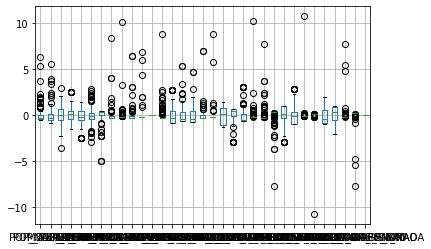

In [8]:
df.boxplot(column=['POP_ALFAB', 'POP_NAO_ALFAB', 'MEDIA_INFRA',
                        'PER_SEXO_F', 'PER_SEXO_M', 'IDADE_MEDIA', 'PER_RACA_BRANCA', 'PERC_RACA_PRETA',
                        'PERC_RACA_AMARELA', 'PERC_RACA_PARDA', 'PERC_RACA_INDIGENA', 'PERC_RACA_IGNORADA',
                        'PERC_SEM_ESCOLARIDADE', 'PERC_ESCOL_FUND_1', 'PERC_ESCOL_FUND_2', 'PERC_ESCOL_MEDIO',
                        'PERC_ESCOL_SUPERIOR', 'PERC_ESCOL_NAO_APLIC', 'PERC_ESCOL_IGNORADO', 'PERC_ZONA_URBANA',
                        'PERC_ZONA_RURAL', 'PERC_ZONA_PERIURBANA', 'PERC_CONTATO_AVE_SUINO_SIM',
                        'PERC_CONTATO_AVE_SUINO_NAO', 'PERC_TOSSE_SIM', 'PERC_TOSSE_NAO', 'PERC_DOWN_SIM', 'PERC_DOWN_NAO',
                        'PERC_VACINADO_GRIPE_SIM', 'PERC_VACINADO_GRIPE_NAO', 'PERC_HIST_VIAGEM_SIM', 'PERC_HIST_VIAGEM_NAO',
                        'PERC_ZONA_IGNORADA'])

In [9]:
X = df[['POP_ALFAB', 'POP_NAO_ALFAB', 'MEDIA_INFRA',
                        'PER_SEXO_F', 'PER_SEXO_M', 'IDADE_MEDIA', 'PER_RACA_BRANCA', 'PERC_RACA_PRETA',
                        'PERC_RACA_AMARELA', 'PERC_RACA_PARDA', 'PERC_RACA_INDIGENA', 'PERC_RACA_IGNORADA',
                        'PERC_SEM_ESCOLARIDADE', 'PERC_ESCOL_FUND_1', 'PERC_ESCOL_FUND_2', 'PERC_ESCOL_MEDIO',
                        'PERC_ESCOL_SUPERIOR', 'PERC_ESCOL_NAO_APLIC', 'PERC_ESCOL_IGNORADO', 'PERC_ZONA_URBANA',
                        'PERC_ZONA_RURAL', 'PERC_ZONA_PERIURBANA', 'PERC_CONTATO_AVE_SUINO_SIM',
                        'PERC_CONTATO_AVE_SUINO_NAO', 'PERC_TOSSE_SIM', 'PERC_TOSSE_NAO', 'PERC_DOWN_SIM', 'PERC_DOWN_NAO',
                        'PERC_VACINADO_GRIPE_SIM', 'PERC_VACINADO_GRIPE_NAO', 'PERC_HIST_VIAGEM_SIM', 'PERC_HIST_VIAGEM_NAO',
                        'PERC_ZONA_IGNORADA']].iloc[:]
y = df['CASOS_100k_H']

In [10]:
# Fit regression model
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

In [11]:
# feature selection
from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel
rfe = RFE(estimator=svr_lin, n_features_to_select=5, step=1)
rfe.fit(X, y)

# ranking = rfe.ranking_.reshape((-1, 33))

RFE(estimator=SVR(C=100, gamma='auto', kernel='linear'), n_features_to_select=5)

In [12]:
sranking = pd.Series(rfe.ranking_, index=['POP_ALFAB', 'POP_NAO_ALFAB', 'MEDIA_INFRA',
                        'PER_SEXO_F', 'PER_SEXO_M', 'IDADE_MEDIA', 'PER_RACA_BRANCA', 'PERC_RACA_PRETA',
                        'PERC_RACA_AMARELA', 'PERC_RACA_PARDA', 'PERC_RACA_INDIGENA', 'PERC_RACA_IGNORADA',
                        'PERC_SEM_ESCOLARIDADE', 'PERC_ESCOL_FUND_1', 'PERC_ESCOL_FUND_2', 'PERC_ESCOL_MEDIO',
                        'PERC_ESCOL_SUPERIOR', 'PERC_ESCOL_NAO_APLIC', 'PERC_ESCOL_IGNORADO', 'PERC_ZONA_URBANA',
                        'PERC_ZONA_RURAL', 'PERC_ZONA_PERIURBANA', 'PERC_CONTATO_AVE_SUINO_SIM',
                        'PERC_CONTATO_AVE_SUINO_NAO', 'PERC_TOSSE_SIM', 'PERC_TOSSE_NAO', 'PERC_DOWN_SIM', 'PERC_DOWN_NAO',
                        'PERC_VACINADO_GRIPE_SIM', 'PERC_VACINADO_GRIPE_NAO', 'PERC_HIST_VIAGEM_SIM', 'PERC_HIST_VIAGEM_NAO',
                        'PERC_ZONA_IGNORADA'])
topfeatures = sranking[sranking <= 5]
topfeatures

POP_ALFAB                     1
MEDIA_INFRA                   1
PER_SEXO_M                    3
IDADE_MEDIA                   1
PERC_RACA_INDIGENA            1
PERC_ESCOL_FUND_2             2
PERC_ESCOL_NAO_APLIC          5
PERC_CONTATO_AVE_SUINO_NAO    4
PERC_TOSSE_NAO                1
dtype: int64

In [13]:
X = X[topfeatures.index]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
X_train.shape

(81, 9)

In [16]:
X_test.shape

(35, 9)

In [17]:
model_lin = svr_lin.fit(X_train, y_train)

In [18]:
def predict(model, X_test, y_test):
    y_pred = model.predict(X_test)
    #mostra predições x valores reais
    return (y_pred, pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

In [19]:
y_pred_lin, df_lin = predict(model_lin, X_test, y_test)
df_lin.head(5)

,Actual,Predicted
10,4769.306,3481.245390
74,3491.167,2925.400385
66,3637.625,3353.946390
51,2611.796,3206.201234
7,5801.942,3440.690581


In [20]:
#verifica diferentes métricas de avaliação
from sklearn import metrics

def showMetrics(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Determination Coefficient (R^2)', metrics.r2_score(y_test, y_pred))

In [21]:
showMetrics(y_test, y_pred_lin)

Mean Absolute Error: 1219.7397209853305
Mean Squared Error: 2763745.445496247
Root Mean Squared Error: 1662.4516370397807
Determination Coefficient (R^2) -0.27133230556525123


In [22]:
from sklearn.model_selection import cross_val_score

cv_4_results = cross_val_score(model_lin, X, y, cv=4, scoring="neg_median_absolute_error")
print(cv_4_results)
print(cv_4_results.mean())

[-941.20853586 -985.78030382 -747.17209863 -909.75405146]
-895.9787474461241


In [23]:
cv_4_results = cross_val_score(model_lin, X, y, cv=4, scoring="neg_root_mean_squared_error")
print(cv_4_results)
print(cv_4_results.mean())

[-1940.32252004 -1399.67854765 -1289.24576498 -2585.72791399]
-1803.7436866657285


In [24]:
cv_4_results = cross_val_score(model_lin, X, y, cv=4, scoring="neg_mean_absolute_error")
print(cv_4_results)
print(cv_4_results.mean())

[-1342.47018992 -1125.55275026 -1024.31092241 -1608.16335141]
-1275.1243035022821
